In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm

In [3]:
nome_arq = 'Dados Titanic -  IA.xlsx'
df = pd.read_excel(nome_arq)
df.head(3)

,Passageiro,Sobrevivente,Classe,Nome,Sexo,Idade,Irmãos,Pais,Tarifa
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,712833.00
2,3,1,3,"Heikkinen, Miss. Laina",feminino,26.0,0,0,7925.00


In [4]:
df['fem'] = df.Sexo.map({'masculino':0, 'feminino':1}).astype(int)

In [5]:
df.columns

Index(['Passageiro', 'Sobrevivente', 'Classe', 'Nome', 'Sexo', 'Idade',
       'Irmãos', 'Pais', 'Tarifa', 'fem'],
      dtype='object')

In [6]:
df_quant = df[['Sobrevivente', 'Classe', 'Idade',
       'Irmãos', 'Pais', 'Tarifa', 'fem']]
df_quant.columns

Index(['Sobrevivente', 'Classe', 'Idade', 'Irmãos', 'Pais', 'Tarifa', 'fem'], dtype='object')

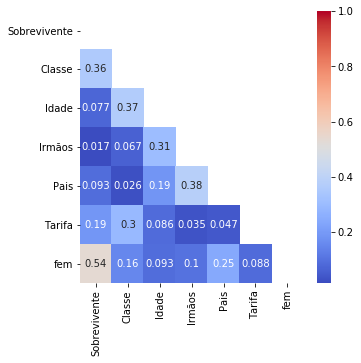

In [7]:
# matriz de correlação df_quant
fig, ax = plt.subplots(figsize=(5, 5)) 
mask = np.zeros_like(df_quant.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_quant.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

In [14]:
x_col = ['Classe', 'Tarifa', 'fem']
y_col = 'Sobrevivente'
X = df[x_col]
y = df[y_col]

In [15]:
#X = sm.add_constant(X)
model = sm.Logit(y, X)
modelfit = model.fit()
pred = modelfit.predict(X)
print(modelfit.summary())

Optimization terminated successfully.
         Current function value: 0.469527
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Sobrevivente   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Apr 2020   Pseudo R-squ.:                  0.3048
Time:                        20:43:23   Log-Likelihood:                -335.24
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.419e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Classe        -0.7141      0.056    -12.830      0.000      -0.823      -0.605
Tarifa      9.025e-07   3.58e